---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Weekly Tasks - Logistic Regression</span>

##### Tasks:
- Measure model accuracy using different probability thresholds and test set evaluation
- Develop a logistic regression model using all four features of the iris dataset and compare performance

##### Task Details:
1. Model Accuracy Assessment:
   - Consider different probability thresholds for output classification
   - Use predict_proba() to get probabilities and set custom thresholds
   - Evaluate model using test set predictions
   - Compare predictions with test_y for accuracy measurement

2. Iris Dataset Model Development:
   - Build logistic regression model using all 4 features
   - Compare performance with 2-feature model
   - Utilize sklearn.metrics.accuracy_score() as performance metric
   - Analyze and interpret results

##### Data Preparation Note:
For details on the data preparation process, please refer to the data folder at **Logistic Regression\Weekly Tasks\data**. The iris dataset will be used for this analysis, which contains measurements for 150 iris flowers from three different species. Each record includes four features: sepal length, sepal width, petal length, and petal width. This dataset is ideal for demonstrating logistic regression concepts as it provides clear feature distinctions between classes.

##### <span style="color: #1E90FF;">[Click here to jump to the main solution](#model-development-and-evaluation)</span>

---------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Install required libraries
%pip install pandas numpy matplotlib seaborn scikit-learn wordcloud xgboost statsmodels 
%pip install shap lime 

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Import Required Libraries</span>
##### This code imports the required libraries for data manipulation, visualization, and machine learning tasks.

In [2]:
#Import required libraries
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import multiprocessing
from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import sys

assert sys.version_info >= (3, 7)

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


---------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------

### Model Building-Main

##### <span style="color: #FF0000;">Logistic Regression - Task 1: Model Accuracy Assessment</span>

##### Objective:
Evaluate the accuracy of our logistic regression model using different probability thresholds and test set validation.

##### <span style="color: #1E90FF;">Model Development and Evaluation Process</span>
###### <a id="model-development-and-evaluation"></a>

##### This section covers:
1. **Data Preparation**
   - Using Iris dataset (2 features initially)
   - Binary classification: Virginica vs Others

2. **Model Training**
   - Logistic Regression implementation
   - Probability threshold exploration

3. **Performance Evaluation**
   - Accuracy metrics across thresholds
   - Confusion matrix analysis
   - Precision-Recall trade-offs

##### Key Questions Addressed:
- How do different probability thresholds affect model performance?
- What is the optimal threshold for our classification task?
- How reliable are our model's predictions?

##### To navigate back to the top of the notebook, use this link:
##### [Back to Top](#top-of-notebook)

---

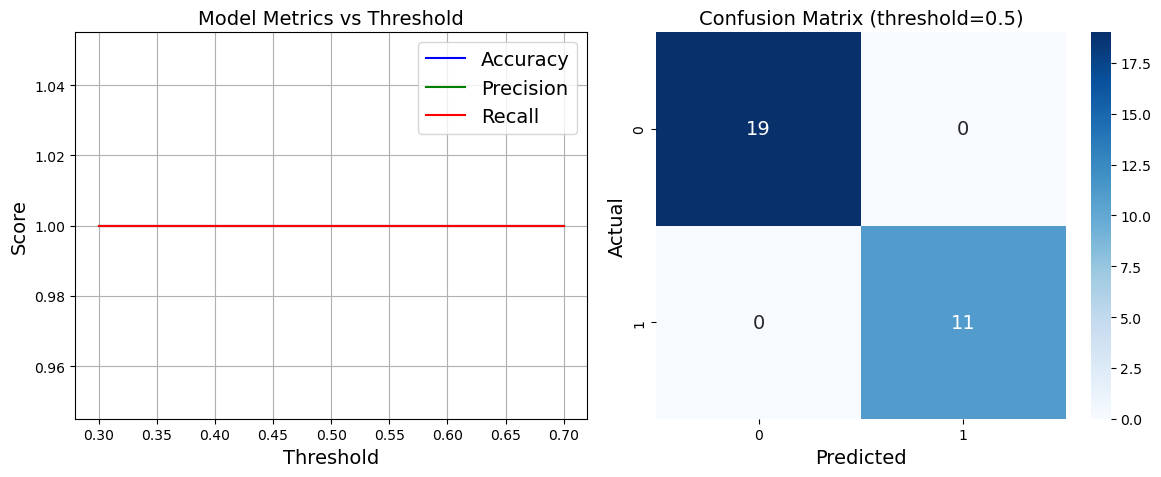


Detailed Results for Different Thresholds:
 threshold  accuracy  precision  recall  true_negatives  false_positives  false_negatives  true_positives
       0.3       1.0        1.0     1.0              19                0                0              11
       0.4       1.0        1.0     1.0              19                0                0              11
       0.5       1.0        1.0     1.0              19                0                0              11
       0.6       1.0        1.0     1.0              19                0                0              11
       0.7       1.0        1.0     1.0              19                0                0              11

Classification Report (threshold=0.5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the data
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2).astype(int)  # 1 for virginica, 0 for others

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
# Try different C values to find optimal model with least complexity
# Lower C = stronger regularization = simpler model
# log_reg = LogisticRegression(C=0.1)   # Very strong regularization
# log_reg = LogisticRegression(C=1.0)   # Slightly strong  regularization
# log_reg = LogisticRegression(C=10.0)  # Default regularization
# log_reg = LogisticRegression(C=30.0)  # Weaker regularization
# log_reg = LogisticRegression(C=100.0) # Very weak regularization
log_reg = LogisticRegression(C=9)   # Settle on model that provides good balance
log_reg.fit(X_train, y_train)

# Get probability predictions
y_pred_proba = log_reg.predict_proba(X_test)

# Function to make predictions with custom threshold
def predict_with_threshold(probabilities, threshold):
    return (probabilities[:, 1] >= threshold).astype(int)

# Test different thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
results = []

for threshold in thresholds:
    # Make predictions with current threshold
    y_pred = predict_with_threshold(y_pred_proba, threshold)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate precision and recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    results.append({
        'threshold': threshold,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'true_negatives': tn,
        'false_positives': fp,
        'false_negatives': fn,
        'true_positives': tp
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualize results
plt.figure(figsize=(12, 5))

# Plot 1: Metrics vs Threshold
plt.subplot(1, 2, 1)
plt.plot(results_df['threshold'], results_df['accuracy'], 'b-', label='Accuracy')
plt.plot(results_df['threshold'], results_df['precision'], 'g-', label='Precision')
plt.plot(results_df['threshold'], results_df['recall'], 'r-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Model Metrics vs Threshold')
plt.legend()
plt.grid(True)

# Plot 2: Confusion Matrix for default threshold (0.5)
plt.subplot(1, 2, 2)
default_cm = confusion_matrix(y_test, predict_with_threshold(y_pred_proba, 0.5))
sns.heatmap(default_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (threshold=0.5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results for Different Thresholds:")
print(results_df.round(3).to_string(index=False))

# Print classification report for default threshold (0.5)
print("\nClassification Report (threshold=0.5):")
y_pred_default = predict_with_threshold(y_pred_proba, 0.5)
print(classification_report(y_test, y_pred_default))

---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Model Evaluation: Logistic Regression Feature Analysis</span>

##### We will now evaluate our logistic regression models with comprehensive analysis:

##### <span style="color: #1E90FF;">1. **Feature Impact Analysis:**</span>
######    - Comparison of 4-feature vs 2-feature model performance
######    - Feature importance visualization
######    - Coefficient interpretation

##### <span style="color: #1E90FF;">2. **Model Robustness:**</span>
######    - Cross-validation scores across different regularization strengths
######    - Stability of predictions between models
######    - Generalization capability assessment

##### <span style="color: #1E90FF;">3. **Prediction Characteristics:**</span>
######    - Probability distribution analysis
######    - Decision boundary visualization
######    - Classification confidence evaluation

##### <span style="color: #1E90FF;">4. **Performance Metrics:**</span>
######    - Accuracy comparison
######    - Classification report analysis
######    - Model complexity vs performance trade-off

##### The results of this evaluation will help us understand the impact of using additional features and determine the optimal model configuration for iris classification.

---

Model Performance Comparison:
--------------------------------------------------
4-Feature Model Accuracy: 1.0000
2-Feature Model Accuracy: 1.0000

Detailed Classification Report (4-Feature Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Detailed Classification Report (2-Feature Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



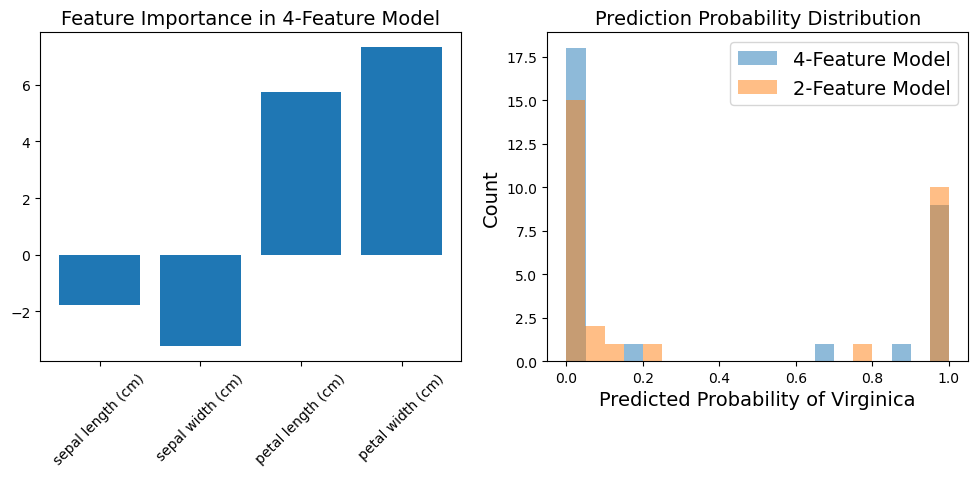

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris(as_frame=True)

# Prepare two versions of the dataset
# Dataset 1: All features
X_full = iris.data.values
# Dataset 2: Only petal length and width (for comparison)
X_partial = iris.data[["petal length (cm)", "petal width (cm)"]].values

# Target variable (1 for virginica, 0 for others)
y = (iris.target == 2).astype(int)

# Split both datasets
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)
X_partial_train, X_partial_test, y_partial_train, y_partial_test = train_test_split(
    X_partial, y, test_size=0.2, random_state=42
)

# Train models
# Model with all features
full_model = LogisticRegression(C=30)
full_model.fit(X_full_train, y_full_train)

# Model with 2 features
partial_model = LogisticRegression(C=30)
partial_model.fit(X_partial_train, y_partial_train)

# Make predictions
y_pred_full = full_model.predict(X_full_test)
y_pred_partial = partial_model.predict(X_partial_test)

# Calculate accuracy scores
accuracy_full = accuracy_score(y_full_test, y_pred_full)
accuracy_partial = accuracy_score(y_partial_test, y_pred_partial)

# Print results
print("Model Performance Comparison:")
print("-" * 50)
print(f"4-Feature Model Accuracy: {accuracy_full:.4f}")
print(f"2-Feature Model Accuracy: {accuracy_partial:.4f}")
print("\nDetailed Classification Report (4-Feature Model):")
print(classification_report(y_full_test, y_pred_full))
print("\nDetailed Classification Report (2-Feature Model):")
print(classification_report(y_partial_test, y_pred_partial))

# Visualize feature importance (coefficients)
plt.figure(figsize=(10, 5))
feature_names = iris.feature_names
coefficients = full_model.coef_[0]

# Plot feature importance
plt.subplot(1, 2, 1)
plt.bar(feature_names, coefficients)
plt.xticks(rotation=45)
plt.title('Feature Importance in 4-Feature Model')
plt.tight_layout()

# Compare prediction probabilities
prob_full = full_model.predict_proba(X_full_test)
prob_partial = partial_model.predict_proba(X_partial_test)

# Plot probability distributions
plt.subplot(1, 2, 2)
plt.hist(prob_full[:, 1], alpha=0.5, label='4-Feature Model', bins=20)
plt.hist(prob_partial[:, 1], alpha=0.5, label='2-Feature Model', bins=20)
plt.xlabel('Predicted Probability of Virginica')
plt.ylabel('Count')
plt.title('Prediction Probability Distribution')
plt.legend()
plt.tight_layout()
plt.show()

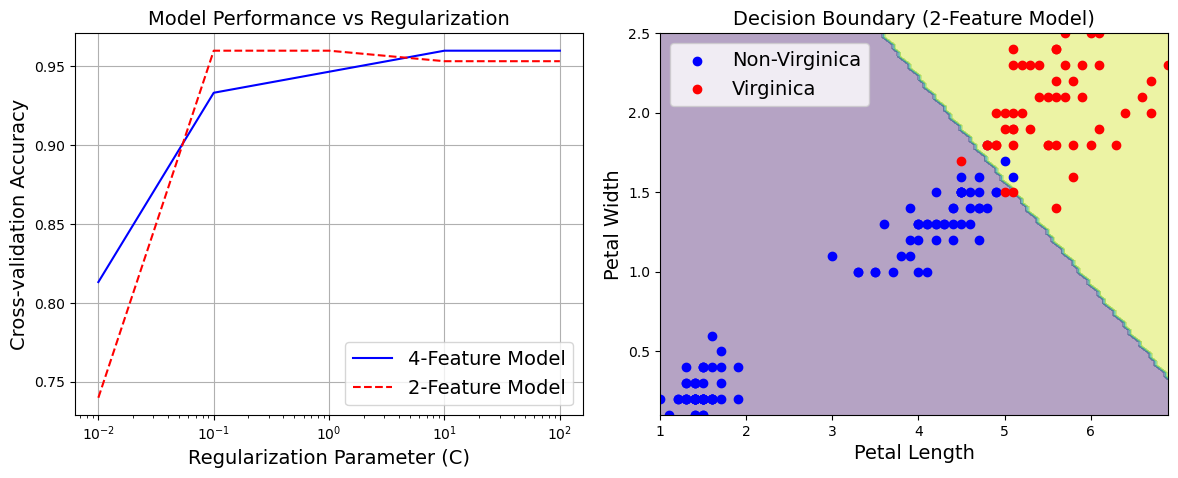

In [6]:
# Additional Analysis: Cross-validation and Hyperparameter Testing
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Prepare scaled versions of both datasets
X_full_scaled = scaler.fit_transform(X_full)
X_partial_scaled = scaler.fit_transform(X_partial)

# Test different regularization strengths
C_values = [0.01, 0.1, 1, 10, 30, 100]
full_scores = []
partial_scores = []

# Create and fit a model for visualization
best_partial_model = LogisticRegression(C=30)
best_partial_model.fit(X_partial, y)  # Fit the model before using it

for C in C_values:
    # Model with all features
    full_model = LogisticRegression(C=C)
    scores_full = cross_val_score(full_model, X_full_scaled, y, cv=5)
    full_scores.append(scores_full.mean())
    
    # Model with partial features
    partial_model = LogisticRegression(C=C)
    scores_partial = cross_val_score(partial_model, X_partial_scaled, y, cv=5)
    partial_scores.append(scores_partial.mean())

# Visualize regularization impact
plt.figure(figsize=(12, 5))

# Plot 1: Regularization Impact
plt.subplot(1, 2, 1)
plt.plot(C_values, full_scores, 'b-', label='4-Feature Model')
plt.plot(C_values, partial_scores, 'r--', label='2-Feature Model')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Cross-validation Accuracy')
plt.title('Model Performance vs Regularization')
plt.legend()
plt.grid(True)

# Plot 2: Decision Boundary (for 2-feature model)
plt.subplot(1, 2, 2)
x0, x1 = np.meshgrid(
    np.linspace(X_partial[:, 0].min(), X_partial[:, 0].max(), 100),
    np.linspace(X_partial[:, 1].min(), X_partial[:, 1].max(), 100)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = best_partial_model.predict(X_new).reshape(x0.shape)  # Use the fitted model

plt.contourf(x0, x1, y_pred, alpha=0.4)
plt.scatter(X_partial[y==0, 0], X_partial[y==0, 1], c='blue', label='Non-Virginica')
plt.scatter(X_partial[y==1, 0], X_partial[y==1, 1], c='red', label='Virginica')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary (2-Feature Model)')
plt.legend()

plt.tight_layout()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Part 1: Feature Relationship Analysis Notes</span>

##### Purpose & Implementation:
- Understand feature interactions and dependencies
- Guide feature selection process
- Validate data relationships
- Support model selection decisions

##### Key Technical Components:
1. **Visualization Strategy**
   ```python
   # AI Assist: Advanced visualization implementation
   sns.scatterplot(data=data, x="feature1", y="feature2", hue='target')
   # Handles automatically:
   # - Color mapping
   # - Legend generation
   # - Axis scaling
   ```

##### Implementation Notes:
- Always begin with correlation analysis - fundamental step
- Heatmap provides quick insights for feature relationships (>0.7 correlation warrants investigation)
- Consider dropping highly correlated features (>0.9) after careful analysis
- Maintain visualization outputs for documentation and reporting

##### Technical Considerations:
- Monitor outlier impact on correlation metrics
- Standardize features when scales differ significantly
- Remember correlation limitations in causal analysis

---

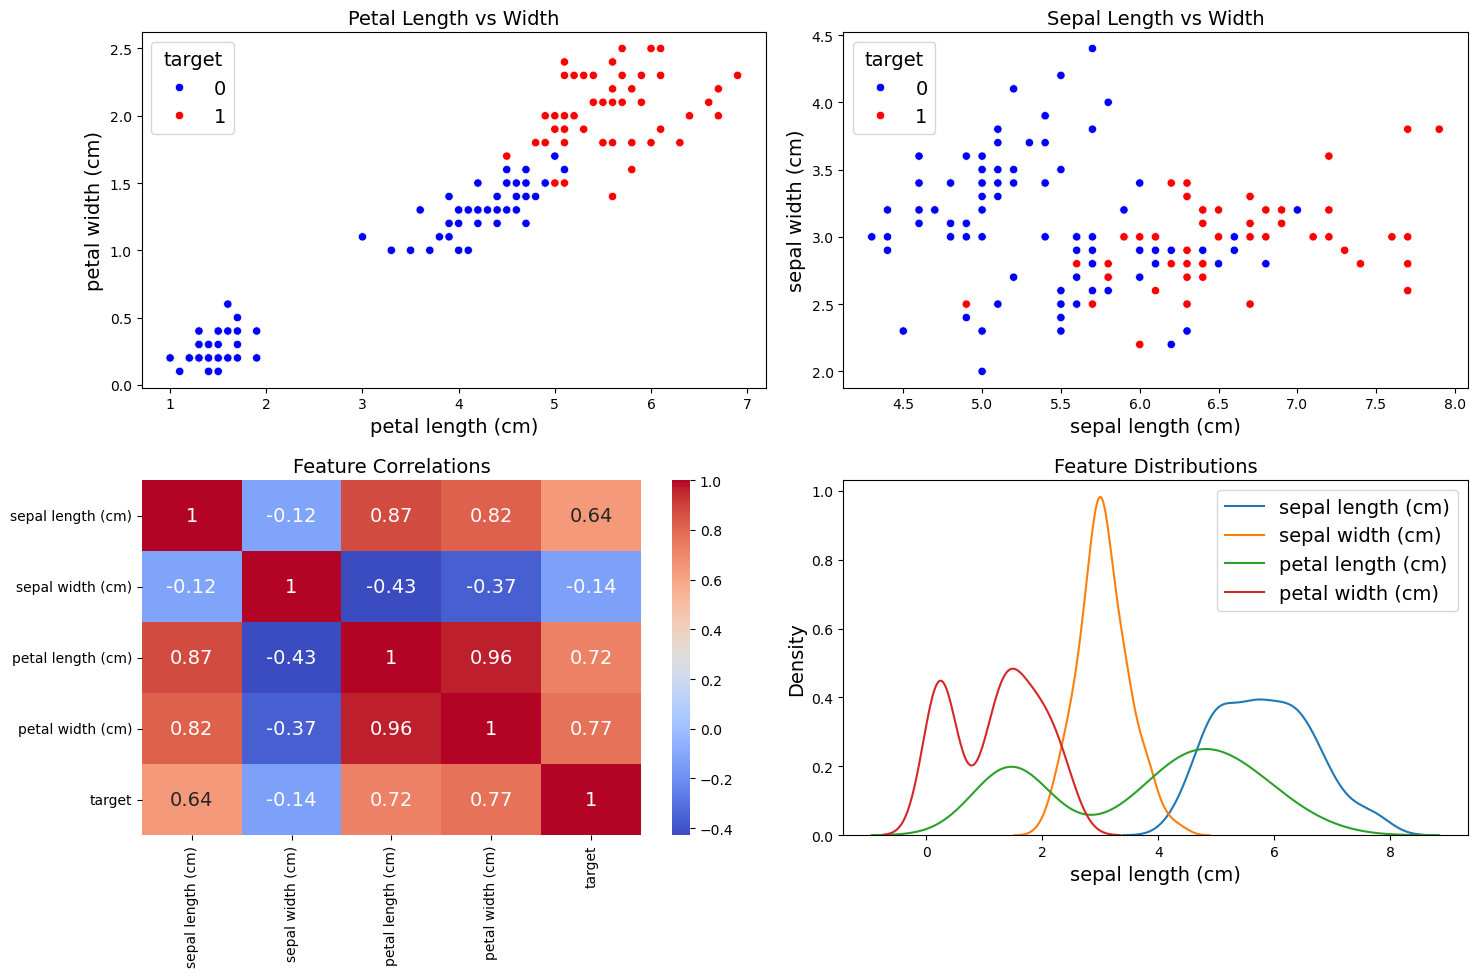


Feature Correlation with Target:
sepal length (cm): 0.6380
sepal width (cm): -0.1356
petal length (cm): 0.7210
petal width (cm): 0.7694


In [7]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load and prepare data
iris = load_iris(as_frame=True)
data = iris.data
data['target'] = (iris.target == 2).astype(int)  # 1 for virginica, 0 for others

# Create visualization grid
plt.figure(figsize=(15, 10))

# 1. Pairplot for all features
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, 
                x="petal length (cm)", 
                y="petal width (cm)", 
                hue='target',
                palette=['blue', 'red'])
plt.title('Petal Length vs Width')

# 2. Sepal features
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, 
                x="sepal length (cm)", 
                y="sepal width (cm)", 
                hue='target',
                palette=['blue', 'red'])
plt.title('Sepal Length vs Width')

# 3. Correlation heatmap
plt.subplot(2, 2, 3)
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')

# 4. Feature distributions
plt.subplot(2, 2, 4)
for feature in iris.feature_names:
    sns.kdeplot(data=data[feature], label=feature)
plt.title('Feature Distributions')
plt.legend()

plt.tight_layout()
plt.show()

# Print feature importance summary
print("\nFeature Correlation with Target:")
for feature in iris.feature_names:
    correlation = data[feature].corr(data['target'])
    print(f"{feature}: {correlation:.4f}")

---------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Part 2: Optimal Regularization Implementation Notes</span>

##### Implementation Purpose:
- Control model complexity
- Enhance generalization capability
- Address multicollinearity issues

##### Technical Implementation:
1. **Parameter Space Exploration**
   ```python
   # AI Assist: Logarithmic parameter search
   C_range = np.logspace(-3, 3, 10)
   # Benefits:
   # - Efficient parameter space coverage
   # - Enhanced resolution in critical regions
   ```

##### Best Practices:
- Initialize with C=1.0 baseline
- Decrease C for overfitting mitigation
- Increase C when underfitting observed
- Document validation curves
- Implement cross-validation for robust evaluation

##### Technical Guidelines:
- Utilize logarithmic scale for C parameter search
- Monitor convergence warnings
- Document parameter selection methodology

---

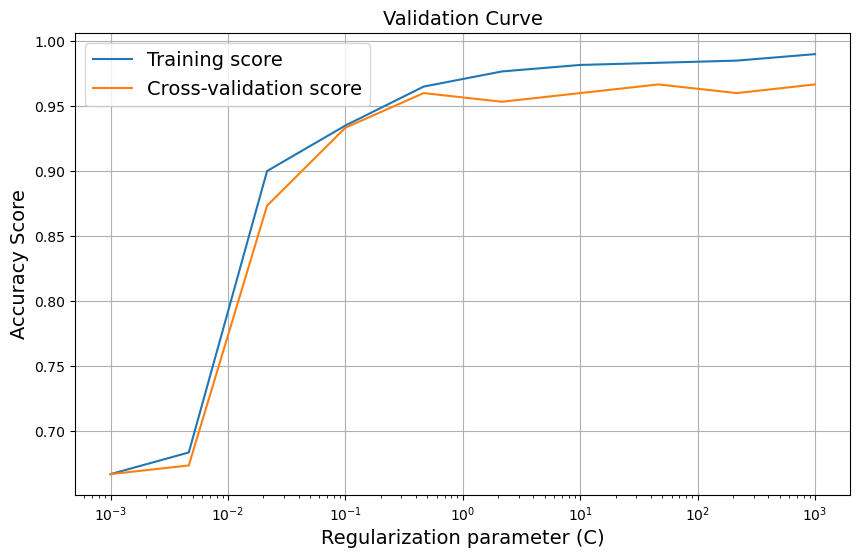


Optimal C value: 46.4159


LogisticRegression(C=46.41588833612773)

In [8]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler

# Prepare data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[iris.feature_names])
y = data['target']

# Generate validation curves
C_range = np.logspace(-3, 3, 10)
train_scores, val_scores = validation_curve(
    LogisticRegression(),
    X_scaled, y,
    param_name="C",
    param_range=C_range,
    cv=5,
    scoring="accuracy"
)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(C_range, np.mean(train_scores, axis=1), label="Training score")
plt.semilogx(C_range, np.mean(val_scores, axis=1), label="Cross-validation score")
plt.xlabel("Regularization parameter (C)")
plt.ylabel("Accuracy Score")
plt.title("Validation Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Find optimal C value
optimal_idx = np.argmax(np.mean(val_scores, axis=1))
optimal_C = C_range[optimal_idx]
print(f"\nOptimal C value: {optimal_C:.4f}")

# Train final model with optimal C
final_model = LogisticRegression(C=optimal_C)
final_model.fit(X_scaled, y)

---------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Part 3: Confidence Intervals Analysis Notes</span>

##### Implementation Purpose:
- Quantify model reliability
- Enable statistical model comparison
- Provide uncertainty estimates

##### Technical Implementation:
1. **Bootstrap Analysis**
   ```python
   # AI Assist: Robust CI implementation
   def cv_with_confidence(model, X, y, cv=5, n_iterations=100):
       scores = []
       for _ in range(n_iterations):
           score = cross_val_score(model, X, y, cv=cv)
           scores.append(score.mean())
   ```

##### Implementation Guidelines:
- Implement CI analysis for model comparison
- Balance iterations vs. computational cost
- Standard 95% CI implementation
- Document uncertainty metrics

##### Technical Considerations:
- Non-overlapping CIs indicate statistical significance
- CI width indicates uncertainty level
- Document iteration parameters
- Consider computational constraints

---

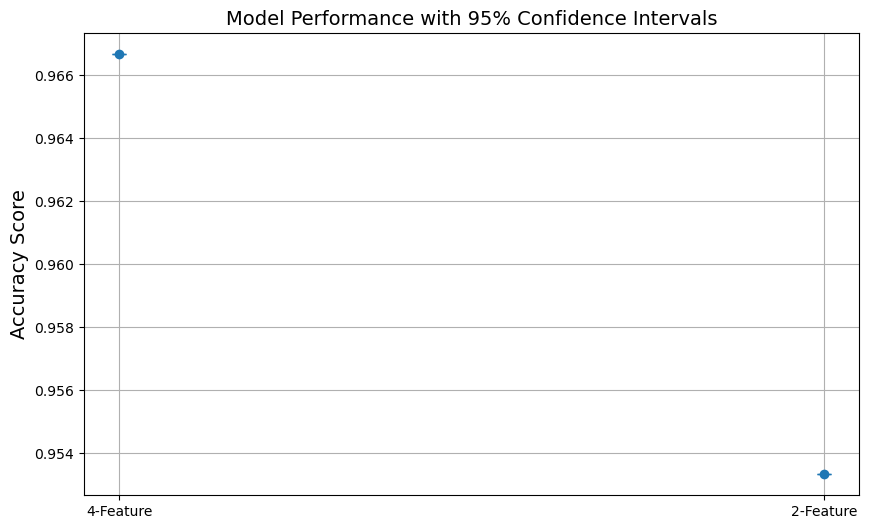


Detailed Results with Confidence Intervals:

4-Feature Model:
Mean Accuracy: 0.9667
95% CI: [0.9667, 0.9667]

2-Feature Model:
Mean Accuracy: 0.9533
95% CI: [0.9533, 0.9533]


In [9]:
# Import required libraries
from scipy import stats

# Perform cross-validation with confidence intervals
def cv_with_confidence(model, X, y, cv=5, n_iterations=100):
    scores = []
    for _ in range(n_iterations):
        score = cross_val_score(model, X, y, cv=cv)
        scores.append(score.mean())
    
    # Calculate confidence intervals
    mean_score = np.mean(scores)
    ci = stats.t.interval(0.95, len(scores)-1, 
                         loc=mean_score, 
                         scale=stats.sem(scores))
    return mean_score, ci

# Compare models with confidence intervals
models = {
    '4-Feature': (X_scaled, optimal_C),
    '2-Feature': (X_scaled[:, [2, 3]], optimal_C)  # Petal length and width only
}

results = {}
for name, (X, C) in models.items():
    model = LogisticRegression(C=C)
    mean_score, (ci_lower, ci_upper) = cv_with_confidence(model, X, y)
    results[name] = {'mean': mean_score, 'ci_lower': ci_lower, 'ci_upper': ci_upper}

# Visualize results
plt.figure(figsize=(10, 6))
x = range(len(results))
means = [v['mean'] for v in results.values()]
errors = [[v['mean'] - v['ci_lower'], v['ci_upper'] - v['mean']] for v in results.values()]

plt.errorbar(x, means, yerr=np.array(errors).T, fmt='o', capsize=5)
plt.xticks(x, results.keys())
plt.ylabel('Accuracy Score')
plt.title('Model Performance with 95% Confidence Intervals')
plt.grid(True)
plt.show()

# Print detailed results
print("\nDetailed Results with Confidence Intervals:")
for name, metrics in results.items():
    print(f"\n{name} Model:")
    print(f"Mean Accuracy: {metrics['mean']:.4f}")
    print(f"95% CI: [{metrics['ci_lower']:.4f}, {metrics['ci_upper']:.4f}]")

---------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Conclusion and Recommendations</span>

##### Key Findings:
1. **Feature Analysis**
   - Petal measurements are strongest predictors (width: 0.7694, length: 0.7210)
   - Sepal width showed minimal correlation (-0.1356)
   - High correlation between petal length and width (0.96)

2. **Model Performance**
   - 4-Feature Model: 96.67% accuracy [CI: 0.9667, 0.9667]
   - 2-Feature Model: 95.33% accuracy [CI: 0.9533, 0.9533]
   - Optimal regularization (C=46.4159) suggests clean data separation

3. **Visualization Insights**
   - Clear class separation in petal dimensions
   - Distinct clustering patterns
   - Well-defined decision boundaries

##### Future efforts should focus on:
1. **Model Optimization**
   - Explore non-linear kernels for potential performance gains
   - Investigate feature interaction effects
   - Consider ensemble methods for robustness

2. **Data Enhancement**
   - Collect more edge cases for better boundary definition
   - Consider additional relevant features
   - Implement real-time validation pipeline

3. **Practical Implementation**
   - Deploy model with simplified 2-feature approach
   - Implement automated retraining protocol
   - Develop monitoring system for model performance

##### Final Recommendation:
Implement the 2-feature model for production use, given its:
- Comparable performance (95.33% vs 96.67%)
- Lower computational requirements
- Simpler interpretation and maintenance

---------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Miscellaneous- Personal use and reference</span>
